In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tf_lib 
from CVAE import cvae_trainer, models

In [3]:
def preproc(x):
    return x > 0

In [4]:
hparams = tf.contrib.training.HParams(
    num_val=None,
    num_labels=None,
    batch_size=64,
    latent_dim=200,
    debug=True,
    log_dir='logs',
    experiment_name='test_prior_complete',
    condition_size=(10,),
    target_size=(28, 28),
    num_hidden=1000,
    epochs=20,
    lr=1e-3,
    log_freq=20,
    preproc=preproc,
)

In [5]:
train_data, val_data, test_data = tf_lib.loaders.load_mnist(**hparams.values())

[*] Created dataset: train: 60000 (60000.0 labeled), val: 10000, test: 10000


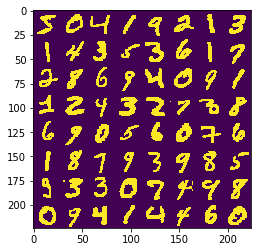

In [6]:
image = tf_lib.utils.visualize_images(train_data[0][:64] * 255)
plt.imshow(image)

In [7]:
model = {
    'prior_net': models.PriorNetwork(hparams),
    'posterior_net': models.PosteriorNetwork(hparams),
    'generator_net': models.GenerationNetwork(hparams),
}

W0821 16:25:07.971568 4625233344 deprecation.py:506] From /Users/laetitia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
session = tf.Session()
trainer = cvae_trainer.CVAE(session, model, hparams, tf_lib.loaders.load_mnist, lambda d: cvae_trainer.one_hot(d[1]))

[*] Created dataset: train: 60000 (60000.0 labeled), val: 10000, test: 10000


W0821 16:25:10.002864 4625233344 deprecation.py:323] From /Users/laetitia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
trainer.train()

W0821 16:25:11.700834 4625233344 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:54: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0821 16:25:12.160243 4625233344 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:111: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0821 16:25:12.178685 4625233344 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:112: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

W0821 16:25:12.257711 4625233344 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:79: The name tf.train.NewCheckpointReader is deprecated. Please use tf.compat.v1.train.NewCheckpointReader instead.

W0821 16:25:12.260104 4625233344 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:88: The name tf

 [*] Reading checkpoints from logs/test_prior_complete
Loading and saving variables ... 
---------
Variables: name (type shape) [size]
---------
prior_network/dense/kernel:0 (float32 10x1000) [10000, bytes: 40000]
prior_network/dense/bias:0 (float32 1000) [1000, bytes: 4000]
prior_network/dense_1/kernel:0 (float32 1000x1000) [1000000, bytes: 4000000]
prior_network/dense_1/bias:0 (float32 1000) [1000, bytes: 4000]
prior_network/dense_2/kernel:0 (float32 1000x200) [200000, bytes: 800000]
prior_network/dense_2/bias:0 (float32 200) [200, bytes: 800]
prior_network/dense_3/kernel:0 (float32 1000x200) [200000, bytes: 800000]
prior_network/dense_3/bias:0 (float32 200) [200, bytes: 800]
posterior_network/dense_4/kernel:0 (float32 794x1000) [794000, bytes: 3176000]
posterior_network/dense_4/bias:0 (float32 1000) [1000, bytes: 4000]
posterior_network/dense_5/kernel:0 (float32 1000x1000) [1000000, bytes: 4000000]
posterior_network/dense_5/bias:0 (float32 1000) [1000, bytes: 4000]
posterior_network

W0821 16:25:12.437922 4625233344 deprecation.py:323] From /Users/laetitia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


 [*] Success to read test_prior_complete.model-18760
18760
 [*] Load SUCCESS
Experiment name test_prior_complete
[*] Saved model in logs/test_prior_complete


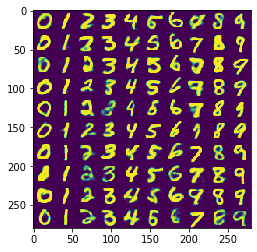

In [10]:
conditions = np.arange(10)
conditions = cvae_trainer.one_hot(conditions)
conditions = np.concatenate([conditions for i in range(10)], axis=0)
logits = trainer.generate_samples(conditions) * 255
image = tf_lib.utils.visualize_images(logits)
plt.imshow(image)